In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_excel("households_1.xlsx")

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,SEX,MSTATUS,CHILD,AGE,BIRTH,RACE,SP,OWN,VEH,SLOC,DWELLRate,NBHDRate,VLoINC,LoINC,MedINC,NSQFT,NBATHS,NBEDS,NROOMS,STORIES,LOTSIZE,CONDO,GARAGE,SEWER,YRBUILT,ESTIMATE,PurchYR,MTGd,MTGdS,HELOC,HELUMP,HiEdInCh
0,1,4,1,48.0,57.0,1,2.0,2,2,3,7,7,24635,39433,61007,1172.0,2,2,4,2,0,1,2,1,1985,55000.0,1988,3,4,2,2,0
1,2,1,1,45.0,57.0,1,2.0,1,2,2,8,10,27787,44432,61310,2400.0,2,3,6,3,88000,2,1,2,1970,135000.0,1997,0,8,2,2,0
2,1,1,2,49.0,57.0,1,1.0,1,3,3,10,10,30983,49575,60090,3521.0,4,4,9,1,43000,2,1,1,2003,850000.0,2003,5,7,2,2,1
3,1,4,0,70.0,57.0,1,2.0,1,0,3,8,8,20074,32090,55919,1700.0,1,3,6,1,17600,2,2,1,1960,130000.0,2013,D,2,2,2,0
4,2,6,0,24.0,57.0,1,2.0,2,2,2,10,8,25918,41455,65041,1600.0,2,3,6,2,10000,2,1,1,1975,180000.0,2013,6,2,2,2,0


In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(', '').str.replace(')', '')

In [6]:
df.head()

,sex,mstatus,child,age,birth,race,sp,own,veh,sloc,dwellrate,nbhdrate,vloinc,loinc,medinc,nsqft,nbaths,nbeds,nrooms,stories,lotsize,condo,garage,sewer,yrbuilt,estimate,purchyr,mtgd,mtgds,heloc,helump,hiedinch
0,1,4,1,48.0,57.0,1,2.0,2,2,3,7,7,24635,39433,61007,1172.0,2,2,4,2,0,1,2,1,1985,55000.0,1988,3,4,2,2,0
1,2,1,1,45.0,57.0,1,2.0,1,2,2,8,10,27787,44432,61310,2400.0,2,3,6,3,88000,2,1,2,1970,135000.0,1997,0,8,2,2,0
2,1,1,2,49.0,57.0,1,1.0,1,3,3,10,10,30983,49575,60090,3521.0,4,4,9,1,43000,2,1,1,2003,850000.0,2003,5,7,2,2,1
3,1,4,0,70.0,57.0,1,2.0,1,0,3,8,8,20074,32090,55919,1700.0,1,3,6,1,17600,2,2,1,1960,130000.0,2013,D,2,2,2,0
4,2,6,0,24.0,57.0,1,2.0,2,2,2,10,8,25918,41455,65041,1600.0,2,3,6,2,10000,2,1,1,1975,180000.0,2013,6,2,2,2,0


Age: column has entries that are year of birth instead of age
Solution: if age > 200, age = currYear - age

Race: can't see trends with specific races easily
Solution: one hot encoding - 21 will be a 1 for each race

Own: has data that is R or D
Solution:should either make NaN or figure something else out

MTGd, MTGds: have values of B or D
Solution: Make NaN

In [31]:
for i, column in enumerate(df.columns):
    print(f"{column} {df[column].unique()}")

sex [1 2]
mstatus [4 1 6 3 5 2]
child [1 2 0 3 7 4 5 6 9 8]
age [48. 45. 49. 70. 24. 76. 40. 71. 63. 35. 62. 60. 72. 51. 56. 39. 50. 43.
 68. 38. 64. 61. 75. 87. 85. 93. 54. 57. 46. 59. 58. 79. 30. 55. 67. 77.
 65. nan 66. 84. 44. 53. 41. 36. 32. 33. 28. 81. 74. 52. 29. 42. 80. 82.
 89. 69. 73. 83. 22. 86. 31. 37. 47. 78. 88. 34. 27. 26. 25. 18. 21. 14.
 20. 15. 23. 19.]
birth [ 57. 207. 210. 650. 610. 611. 238. 383. 652. 315. 128. 120. 380. 342.
 229. 337. 117. 660. 202. 231. 110. 242. 312. 343. 379. 195.  nan  72.
 301. 206. 377. 215. 440. 641. 375.  96. 640. 192. 653. 209. 339. 651.
 385. 654. 185. 212. 239. 313. 661. 555. 222. 109. 119. 147. 218. 213.
 316. 670. 620. 314. 351. 214. 221.]
sp [ 2.  1. nan]
own [ 2.  1. nan]
veh [2 3 0 1 5 4]
sloc [3 2 1 4]
dwellrate [ 7  8 10  9  6  5  4  3  1  2]
nbhdrate [ 7 10  8  9  6  5  0  4  1  3  2]
medinc [ 61007  61310  60090  55919  65041  63000  62900  65800  62206  62241
  69775  61339  72700  59577  74007  73801  63433  75329  58770  64

Below we shall fix age data

In [8]:
df.age = df.age.apply(lambda age: 2019-age if age > 200 else age)

In [9]:
df.age.unique()

array([48., 45., 49., 70., 24., 76., 40., 71., 63., 35., 62., 60., 72.,
       51., 56., 39., 50., 43., 68., 38., 64., 61., 75., 87., 85., 93.,
       54., 57., 46., 59., 58., 79., 30., 55., 67., 77., 65., nan, 66.,
       84., 44., 53., 41., 36., 32., 33., 28., 81., 74., 52., 29., 42.,
       80., 82., 89., 69., 73., 83., 22., 86., 31., 37., 47., 78., 88.,
       34., 27., 26., 25., 18., 21., 14., 20., 15., 23., 19.])

Below we shall fix race data:
    Notes - 17 and 19 are the same
    for 21, we shall assume all five races, especially considering how much of an edge case this is

In [10]:
df['white'] = df.race.apply(lambda race: 1 if race in [1,6,7,8,9,15,16,17,18,19,21] else 0)
df['black'] = df.race.apply(lambda race: 1 if race in [2,6,10,11,12,15,16,21] else 0)
df['american_indian'] = df.race.apply(lambda race: 1 if race in [3,7,10,13,15,17,19,21] else 0)
df['asian'] = df.race.apply(lambda race: 1 if race in [4,8,11,13,14,16,17,18,19,21] else 0)
df['hawaiian'] = df.race.apply(lambda race: 1 if race in [5,9,12,14,18,21] else 0)

In [11]:
df.drop('race', axis=1, inplace=True)

Fix Own and Mortgage Data that contains letter

In [32]:
df.own = df.own.apply(lambda o: np.nan if o in ['R','D'] else o)
df.mtgd = df.mtgd.apply(lambda o: np.nan if o in ['B','D'] else o)
df.mtgds = df.mtgds.apply(lambda o: np.nan if o in ['B','D','R'] else o)

Next, we want to check for multicollinearity

In [14]:
df.corr().style.background_gradient(cmap='seismic')

Very high correlation between Very Low Income and Low Income
Solution: Eliminate one of the two

In [15]:
df[['vloinc','loinc','medinc']]

,vloinc,loinc,medinc
0,24635,39433,61007
1,27787,44432,61310
2,30983,49575,60090
3,20074,32090,55919
4,25918,41455,65041
...,...,...,...
9995,30691,49103,61242
9996,25400,40600,63400
9997,24064,38499,57608
9998,22700,36292,64811


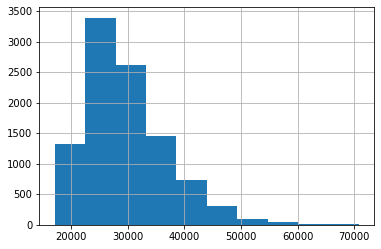

In [16]:
df.vloinc.hist()

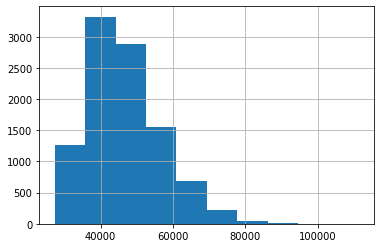

In [17]:
df.loinc.hist()

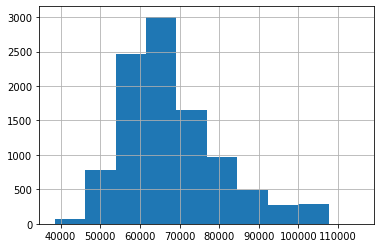

In [18]:
df.medinc.hist()

According to HUD, very-low inc is defined as 50% of median family inc and low-inc is defined as 80% of family inc. Once these numbers are obtained, further adjustments are made depending on multiple different factors

In [19]:
df['vloinc_adj'] = df.vloinc.apply(lambda i: i/.5)
df['loinc_adj'] = df.loinc.apply(lambda i: i/.8)

In [20]:
df[['vloinc','vloinc_adj']]

,vloinc,vloinc_adj
0,24635,49270.0
1,27787,55574.0
2,30983,61966.0
3,20074,40148.0
4,25918,51836.0
...,...,...
9995,30691,61382.0
9996,25400,50800.0
9997,24064,48128.0
9998,22700,45400.0


In [21]:
df[['loinc','loinc_adj']]

,loinc,loinc_adj
0,39433,49291.25
1,44432,55540.00
2,49575,61968.75
3,32090,40112.50
4,41455,51818.75
...,...,...
9995,49103,61378.75
9996,40600,50750.00
9997,38499,48123.75
9998,36292,45365.00


In [22]:
df[['vloinc_adj','loinc_adj','medinc']].corr().style.background_gradient(cmap='seismic')

,vloinc_adj,loinc_adj,medinc
vloinc_adj,1,0.978581,0.721453
loinc_adj,0.978581,1,0.624976
medinc,0.721453,0.624976,1


Here we notice a very high correlation between all three of these factors, possibly indicating we should remove two of them.
I believe we should remove the factors other than median income, since the others are derived from income

In [23]:
df.drop('vloinc', axis=1, inplace=True)
df.drop('vloinc_adj', axis=1, inplace=True)
df.drop('loinc', axis=1, inplace=True)
df.drop('loinc_adj', axis=1, inplace=True)

In [24]:
df.corr().style.background_gradient(cmap='seismic')

,sex,mstatus,child,age,birth,sp,own,veh,sloc,dwellrate,nbhdrate,medinc,nsqft,nbaths,nbeds,nrooms,stories,lotsize,condo,garage,sewer,yrbuilt,estimate,purchyr,mtgd,heloc,helump,hiedinch,white,black,american_indian,asian,hawaiian
sex,1,0.222379,-0.0596814,0.0635988,-0.0497136,0.0312316,0.000372486,-0.0874854,-0.0182572,0.0206831,0.0274968,0.00360849,0.00237891,-0.0488329,-0.063882,-0.0770385,0.00753022,-0.0369855,-0.0576473,0.0673008,-0.0398565,-0.0487811,-0.0397044,-0.0455182,-0.00114995,0.0312553,0.00108613,-0.0434124,-0.0390464,0.0814047,0.00641391,-0.040875,-0.00219986
mstatus,0.222379,1,-0.234997,-0.0356153,-0.0545688,0.0142356,0.135728,-0.250526,-0.00249808,-0.0756196,-0.0529327,-0.022178,-0.0879258,-0.201088,-0.238865,-0.268189,0.0034395,-0.0698319,-0.14541,0.127818,-0.0677642,-0.103169,-0.145183,0.039592,-0.0406055,0.0795134,0.0104869,-0.205219,-0.0643917,0.120712,0.030222,-0.0546348,-0.00966576
child,-0.0596814,-0.234997,1,-0.424806,0.1306,-0.145102,0.0659002,0.244865,-0.00841305,-0.0843755,-0.0598116,0.0508691,0.0596456,0.161842,0.313471,0.246611,0.0216846,-0.0168384,0.110391,-0.0329316,-0.0394076,0.0885219,0.0591972,0.251232,-0.117349,-0.0413982,-0.0321296,0.42924,-0.0607883,0.0125988,-0.00430536,0.0858899,0.00859207
age,0.0635988,-0.0356153,-0.424806,1,-0.0631234,0.104197,-0.248527,-0.135959,-0.00420945,0.140032,0.134973,-0.0146066,0.0126192,-0.0573395,-0.123737,-0.0582241,-0.0203201,0.0443996,-0.0200416,-0.011562,0.0667612,-0.138981,0.0222827,-0.616806,0.255135,-0.0093899,0.0300524,-0.290962,0.0497966,-0.0165204,-0.00104352,-0.0639255,-0.00469837
birth,-0.0497136,-0.0545688,0.1306,-0.0631234,1,-0.297079,0.059436,0.0476624,0.0359372,-0.0178185,-0.0143433,0.083079,0.000836298,0.0385634,0.0627246,0.0216109,0.0199936,-0.0722383,-0.0407518,0.00918558,-0.110797,0.0039101,0.0578345,0.098673,-0.01066,0.0155124,0.0186254,0.0316743,-0.162513,0.0313113,-0.00802171,0.226446,0.0221995
sp,0.0312316,0.0142356,-0.145102,0.104197,-0.297079,1,-0.0782137,-0.00524274,-0.124916,-0.0203421,0.00737591,0.0362754,0.0307356,0.0236715,0.00140178,0.0542097,0.0618322,0.0649949,-0.00670357,-0.0204297,0.0817572,0.0133035,0.0391554,-0.0860163,0.0829222,-0.0232891,0.00484711,0.02804,-0.0765713,0.0623671,-0.0261439,0.0489677,-0.0210569
own,0.000372486,0.135728,0.0659002,-0.248527,0.059436,-0.0782137,1,-0.0600511,-0.077931,-0.124657,-0.118953,0.0425097,-0.0959723,-0.259862,-0.130687,-0.203655,0.00286524,-0.0540228,0.00380083,0.152436,-0.051917,-0.216763,-0.152757,-0.107369,-0.257995,0.0614713,-0.00485763,-0.030562,-0.145715,0.136749,-0.00867646,0.0528238,-0.000260895
veh,-0.0874854,-0.250526,0.244865,-0.135959,0.0476624,-0.00524274,-0.0600511,1,-0.000962384,0.0134337,-0.0132459,0.126194,0.0887038,0.211806,0.243095,0.266229,0.0272526,-0.005081,0.0830308,-0.120672,-0.0173843,0.0860222,0.160443,0.0793604,-0.00269995,-0.0827077,-0.021348,0.143478,-0.0235652,-0.0182716,-0.0225265,0.0693945,0.00374445
sloc,-0.0182572,-0.00249808,-0.00841305,-0.00420945,0.0359372,-0.124916,-0.077931,-0.000962384,1,0.00462607,-0.0235639,-0.349091,-0.0246639,0.167471,0.0446049,-0.00763798,-0.315122,-0.0286051,0.0416102,-0.108259,-0.0209519,0.236987,0.0180047,0.0825018,-0.0760767,0.0332226,0.0417986,-0.0267388,-0.0402074,0.00332964,0.0429281,0.0418066,0.0485235
dwellrate,0.0206831,-0.0756196,-0.0843755,0.140032,-0.0178185,-0.0203421,-0.124657,0.0134337,0.00462607,1,0.557923,-0.0238706,0.0695771,0.160844,0.0674654,0.111337,0.00864139,0.0771118,0.0189669,-0.0964637,0.0527345,0.127841,0.13022,-0.0406598,0.0954886,0.00700921,0.0092028,-0.0230859,0.0432763,-0.0177751,-0.00505423,-0.0460669,0.00287943


Now we can notice moderate correlation between number of beds, baths, and rooms
also moderate correlation between age and purchase year
also between white and black, however we should not do anything with this 

In [36]:
for i, column in enumerate(df.columns):
    print(f"{column} {df[column].unique()}")

sex [1 2]
mstatus [4 1 6 3 5 2]
child [1 2 0 3 7 4 5 6 9 8]
age [48. 45. 49. 70. 24. 76. 40. 71. 63. 35. 62. 60. 72. 51. 56. 39. 50. 43.
 68. 38. 64. 61. 75. 87. 85. 93. 54. 57. 46. 59. 58. 79. 30. 55. 67. 77.
 65. nan 66. 84. 44. 53. 41. 36. 32. 33. 28. 81. 74. 52. 29. 42. 80. 82.
 89. 69. 73. 83. 22. 86. 31. 37. 47. 78. 88. 34. 27. 26. 25. 18. 21. 14.
 20. 15. 23. 19.]
birth [ 57. 207. 210. 650. 610. 611. 238. 383. 652. 315. 128. 120. 380. 342.
 229. 337. 117. 660. 202. 231. 110. 242. 312. 343. 379. 195.  nan  72.
 301. 206. 377. 215. 440. 641. 375.  96. 640. 192. 653. 209. 339. 651.
 385. 654. 185. 212. 239. 313. 661. 555. 222. 109. 119. 147. 218. 213.
 316. 670. 620. 314. 351. 214. 221.]
sp [ 2.  1. nan]
own [ 2.  1. nan]
veh [2 3 0 1 5 4]
sloc [3 2 1 4]
dwellrate [ 7  8 10  9  6  5  4  3  1  2]
nbhdrate [ 7 10  8  9  6  5  0  4  1  3  2]
medinc [ 61007  61310  60090  55919  65041  63000  62900  65800  62206  62241
  69775  61339  72700  59577  74007  73801  63433  75329  58770  64

Further problems:
Age for head of household has values under 18
Lot Size can be zero